<img src = "graphex3.svg">

[[1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


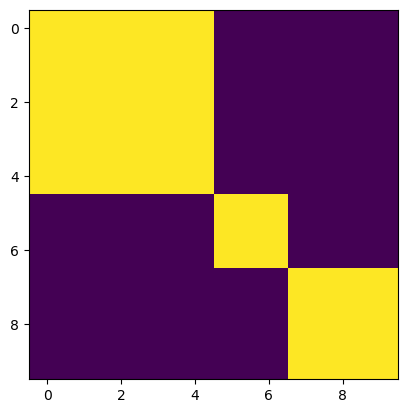

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class AdjacencyMatrix:
    """
    Assume: All vertices have __hash__ implemented
    and __eq__ implemented
    Assume: u and v are zero-indexed integers
    """
    def __init__(self, num_vertices):
        # Row u and column v is a 1 if u and v are connected by 
        # an edge, and 0 otherwise
        self.A = np.zeros((num_vertices, num_vertices))
        self.count = 0
    
    def add_edge(self, u, v):
        self.A[u, v] = 1
        self.A[v, u] = 1
    
    def get_neighbors(self, v):
        # Loop through the row of v and collect
        # all u's that are a 1
        neighbs = set([])
        for u in range(self.A.shape[1]):
            if self.A[v, u] == 1:
                neighbs.add(u)
        return neighbs
    
    def is_edge(self, u, v):
        # This takes O(1) time
        return self.A[u, v] == 1 and self.A[v, u] == 1
    
    def get_two_hops_count(self, u, v):
        # Consider a third vertex in between, call it k
        # Look at all possible k's in between u and v
        count = 0
        for k in range(self.A.shape[0]):
            if self.A[u, k] == 1 and self.A[k, v] == 1:
                count += 1
        return count
    
    def get_all_pairs_two_hops(self):
        A2hop = np.zeros_like(self.A)
        N = self.A.shape[0]
        for u in range(N):
            for v in range(N):
                for k in range(self.A.shape[0]):
                    A2hop[u, v] += self.A[u, k]*self.A[k, v]
        return A2hop
    
    def get_k_hop(self, k):
        Ahop = self.A
        for i in range(k-1):
            Ahop = Ahop.dot(self.A)
            self.count += 1
        return Ahop
    
    def get_k_hop_efficient(self, k, mem={}):
        ## Ex) Compute 2^21 = 2*2*2*2...*2
        ## Or I could break it into (2^10)(2^11)
        ## 2^10 = (2^5)(2^5),  2^11 = (2^5)(2^6)
        res = np.eye(self.A.shape[0])
        if k > 0:
            if k in mem:
                res = mem[k]
            else:
                if k == 1:
                    res = self.A
                else:
                    k1 = k//2
                    k2 = k - k1
                    A1 = self.get_k_hop_efficient(k1, mem)
                    A2 = self.get_k_hop_efficient(k2, mem)
                    res = A1.dot(A2)
                    self.count += 1
                mem[k] = res
        return res
        
    

num_vertices = 10
graph = AdjacencyMatrix(num_vertices)
graph.add_edge(0, 0)
graph.add_edge(0, 1)
graph.add_edge(0, 2)
graph.add_edge(1, 2)
graph.add_edge(2, 3)
graph.add_edge(3, 4)
graph.add_edge(5, 6)
graph.add_edge(7, 8)
graph.add_edge(8, 9)
    
A = graph.A
print(A)
mu, V = np.linalg.eig(A)
plt.imshow(V != 0)


How many paths are there from u to v that use k hops?

Ex) A[u, v] tells us how many paths there are from u to v that use 1 hop

Ex) 2 hops (k = 2)


$(A*A*...A)[u, v]$, where * is the matrix multiplication and there are $k$ factors, tells us how many paths there are from $u$ to $v$ that use $k$ hops.

We can program this efficiently using dynamic programming and the exponent rule to break it down as

$A^{k_1 k_2} = A^{k1}A^{k2}$

Just to show that it's all working, we have:

In [2]:
print(np.allclose(graph.get_k_hop(100), graph.get_k_hop_efficient(100)))

True
